# Library Pre-preration

In [ ]:
# import library
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet50
import time
from torch.autograd import Variable
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from torchvision import models
from torch.autograd import Variable

# Data Pre-preperation

In [ ]:
# Data Pre-preperation
data_path = 'drive/MyDrive/Data/imageClassification'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
os.listdir(data_path)

['list_attribute.txt',
 'gender_classification.csv',
 'class_identity.txt',
 'gender_classification.xlsx',
 'Images',
 'Images_clean']

In [ ]:
# Ambil dataset image dari gdrive
image_list = os.listdir(data_path + '/Images')
print('Jumlah file data image: ', len(os.listdir(data_path + '/Images')))

Jumlah file data image:  5017


In [ ]:
# Load attribute atau label
attr_file = data_path + '/list_attribute.txt'

# Load data ke dataframe
data = pd.read_csv(attr_file, sep='\s+', skiprows=1)


'''
1. EDA
2. Data Cleaning (ubah menjadi dataframe)
3. Hash => untuk duplicate image
4. TensorBoard =>
5. ML Flow
6. PyCaret
7. Joblib
8. Open Vino

untuk test data:
from google.colab import files
uploaded = files.upload()

'''

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-459090310.py:5: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(attr_file, sep='\s+', skiprows=1)


'\n1. EDA\n2. Data Cleaning (ubah menjadi dataframe)\n3. Hash => untuk duplicate image\n4. TensorBoard =>\n5. ML Flow\n6. PyCaret\n7. Joblib\n8. Open Vino\n\nuntuk test data:\nfrom google.colab import files\nuploaded = files.upload()\n\n'

In [ ]:
# Filter nama file dan gambar duplicate
import numpy as np
import hashlib
import shutil
import os

# Buat folder data image mentah dan folder data image setelag di bersihkan
data_path_raw = os.path.join (data_path, 'Images')
data_path_clean = os.path.join (data_path, 'Images_clean')

os.makedirs(data_path_clean, exist_ok=True)

In [ ]:
def image_hash(data_path_raw):
    img = Image.open(data_path_raw).convert("RGB").resize((244, 244))
    arr = np.array(img).tobytes()
    return hashlib.md5(arr).hexdigest()

hashes = {}
unique_files = {}

for filename in os.listdir(data_path_raw):
  src_path = os.path.join(data_path_raw, filename)

  # Filter image duplicate beda nama file
  try:
      h = image_hash(src_path)
  except Exception as e:
      print(f"Error baca {filename}: {e}")
      continue

  # Simpan data image berdasarkan pertama kali muncul
  key = h

  if key not in unique_files:
    unique_files[key] = filename

  # Copy ke folder clean
    dst_path = os.path.join(data_path_clean, filename)
    shutil.copy2(src_path, dst_path)

print("Jumlah asli:", len(os.listdir(data_path_raw)))
print("Jumlah setelah filter:", len(os.listdir(data_path_clean)))

Jumlah asli: 5017
Jumlah setelah filter: 5000


In [ ]:
# buat coloum data image_id
data = data.reset_index().rename(columns={'index': 'image_id'})

In [ ]:
data

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [ ]:
# split data
train_data, test_data = train_test_split(
    data,
    test_size=0.2,
    random_state=42,
)

# Print columns of train_data and test_data to check for 'image_id'
print("Columns in train_data:", train_data.columns)
print("Columns in test_data:", test_data.columns)

Columns in train_data: Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')
Columns in test_data: Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goa

# Pre-processing

In [ ]:
class GenderDataset(Dataset):
    def __init__(self, data, image_folder_path, transform=None):
        self.data = data
        self.image_folder_path = image_folder_path
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # ambil nama file dari kolom 'image_id'
        filename = self.data.iloc[idx]['image_id']
        image_path = os.path.join(self.image_folder_path, filename)

        # buka image dan convert ke RGB
        image = Image.open(image_path).convert('RGB')

        # ambil label gender dari kolom 'Male'
        # Assuming 'Male' column contains 1 for Male and -1 for Female
        # Convert to 0 for Female and 1 for Male
        gender = 1 if self.data.iloc[idx]['Male'] == 1 else 0


        # apply transform
        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(gender, dtype=torch.long)

In [ ]:
transform = transforms.Compose([
    transforms.Resize((244, 244)),           # resize ke 224x224 (ukuran input VGG16)
    transforms.RandomHorizontalFlip(p=0.5),  # augmentasi: flipping kiri/kanan
    transforms.ColorJitter(                  # augmentasi: variasi warna/kontras
        brightness=0.2,
        contrast=0.2,
        saturation=0.2,
        hue=0.1
    ),

    transforms.ToTensor(),                   # ubah ke tensor [0,1]
    transforms.Normalize(                    # normalisasi pakai mean & std ImageNet
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset

# folder image clean
image_folder_path = os.path.join(data_path, 'Images_clean')

# Filter missing file
image_folder = os.path.join(data_path, "Images_clean")

# Semua file yang benar-benar ada
available_files = set(os.listdir(image_folder))

# pastikan hanya pakai file yang ada
train_data = train_data[train_data['image_id'].isin(available_files)].reset_index(drop=True)
test_data = test_data[test_data['image_id'].isin(available_files)].reset_index(drop=True)

print("Jumlah train setelah filter:", len(train_data))
print("Jumlah test setelah filter:", len(test_data))

# Data Set
train_set = GenderDataset (
    train_data,
    image_folder_path = image_folder_path,
    transform = transform
    )

train_loader = DataLoader (
    train_set,
    batch_size = 32, # test dengan 8, nilai awal 32
    shuffle=True,
    num_workers = 4,
    pin_memory = True
    )

# Solusi 2: subset dataset
# subset_indices = list(range(2500))   # ambil 20k gambar pertama
# train_subset = Subset(train_set, subset_indices)


# Data Loader
test_set = GenderDataset(
    test_data,
    os.path.join(data_path, 'Images_clean'),
    transform=transform
    )

test_loader = DataLoader(
    test_set,
    batch_size = 32,
    shuffle=False,
    num_workers = 4,
    pin_memory = True
    )


Jumlah train setelah filter: 4033
Jumlah test setelah filter: 957


# Architecture

In [ ]:
# Model
model = models.vgg16 (pretrained = True)

# Freeze convolutional layers
for param in model.features.parameters():
    param.requires_grad = False

# Ganti classifier terakhir
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(4096, 2)

num_classes = 2  # ganti sesuai dataset kamu
model.classifier = nn.Sequential(
    nn.Linear(512 * 7 * 7, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, num_classes)
)

# Check device, jika ada gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Loss function
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Modeling

In [ ]:
# Penjagaan untuk force train model jika val loss tidak membaik

class EarlyStopping:
    def __init__(self, patience=3, min_delta=0.001, verbose=False):
        """
        Parameters:
            patience (int): Berapa epoch menunggu sebelum stop kalau val_loss tidak membaik.
            min_delta (float): Perbedaan minimal antara val_loss baru dan terbaik untuk dianggap perbaikan.
            verbose (bool): Kalau True, print pesan setiap kali ada improvement.
        """
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.counter = 0
        self.best_loss = np.inf
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.best_model_state = model.state_dict().copy()
            self.counter = 0
            if self.verbose:
                print(f"Validation loss improved to {val_loss:.4f}")
        else:
            self.counter += 1
            if self.verbose:
                print(f"No improvement for {self.counter} epoch(s).")
            if self.counter >= self.patience:
                self.early_stop = True

In [ ]:
def train_model(model, dataloaders, dataset_sizes, criterion, early_stopping, optimizer, is_cuda=torch.cuda.is_available(), num_epochs=20):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        print("-" * 20)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluation mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                # Move data to the appropriate device
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            # deep copy the model if validation accuracy improves
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

            # Cek kondisi early stopping
            early_stopping(epoch_loss, model)
            if early_stopping.early_stop:
              print("Early stopping triggered! Stopping training.")
              model.load_state_dict(early_stopping.best_model_state)
              return model

        print()

    time_elapsed = time.time() - since
    print(f"Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s")
    print(f"Best val Acc: {best_acc:.4f}")

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
dataloders = {
    "train":train_loader, "val":test_loader
}
dataset_sizes= {
    "train":len(train_set), "val":len(test_set)
}

In [ ]:
use_gpu = torch.cuda.is_available()
print(use_gpu)

if use_gpu:
  model = model.to("cuda")

True


In [ ]:
early_stopping = EarlyStopping(patience=3, verbose=True)
model = train_model(model, dataloders, dataset_sizes, criterion, early_stopping, optimizer, use_gpu, num_epochs = 5)

Epoch 1/5
--------------------
train Loss: 0.2549 Acc: 0.8959
Validation loss improved to 0.2549
val Loss: 0.2024 Acc: 0.9216
Validation loss improved to 0.2024

Epoch 2/5
--------------------
train Loss: 0.1686 Acc: 0.9316
Validation loss improved to 0.1686
val Loss: 0.1667 Acc: 0.9352
Validation loss improved to 0.1667

Epoch 3/5
--------------------
train Loss: 0.1271 Acc: 0.9554
Validation loss improved to 0.1271
val Loss: 0.1961 Acc: 0.9321
No improvement for 1 epoch(s).

Epoch 4/5
--------------------
train Loss: 0.0994 Acc: 0.9668
Validation loss improved to 0.0994
val Loss: 0.1854 Acc: 0.9373
No improvement for 1 epoch(s).

Epoch 5/5
--------------------
train Loss: 0.0762 Acc: 0.9752
Validation loss improved to 0.0762
val Loss: 0.1705 Acc: 0.9383
No improvement for 1 epoch(s).

Training complete in 2m 15s
Best val Acc: 0.9383


# Evaluation

In [ ]:
def evaluate_model(model, test_loader, target_labels):
    model.eval()  # Set the model to evaluation mode
    running_corrects = 0
    all_labels = []
    all_preds = []

    # Iterate over data.
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

        running_corrects += torch.sum(preds == labels.data)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

    accuracy = running_corrects.double() / len(test_loader.dataset)
    print(f"Test Accuracy: {accuracy:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names = target_labels))

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    print("\nConfusion Matrix:")
    print(cm)

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(target_labels))
    plt.xticks(tick_marks, target_labels, rotation=45)
    plt.yticks(tick_marks, target_labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Test Accuracy: 0.9404

Classification Report:
              precision    recall  f1-score   support

      female       0.96      0.94      0.95       579
        male       0.91      0.95      0.93       378

    accuracy                           0.94       957
   macro avg       0.94      0.94      0.94       957
weighted avg       0.94      0.94      0.94       957


Confusion Matrix:
[[542  37]
 [ 20 358]]


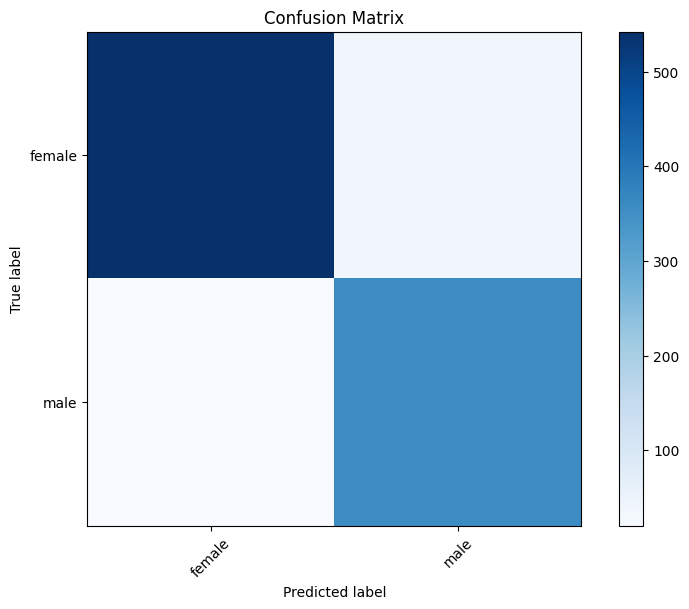

In [ ]:
evaluate_model(model, dataloders['val'], ["female", "male"])